### HW1 for Fixed-income Quantitative Trading

**Instructions**
Build a Jupyter Notebook to do the following:
1) Upload data in 'CMT-all.xlsx' into pandas data frame
2) Compute covariance matrix of the levels of the rates (R) and daily returns (dR), doing something reasonable about NAs 
3) (Extra credit/Optional) Perform PCA via eigenvalue decomposition or SVD, and plot time series of the first 3 principal components

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA as sklearnPCA
from matplotlib import pyplot as plt

# read CMT file into pandas dataframe
data_raw = pd.read_excel('CMT-all.xlsx')
data_raw.set_index('Date', inplace=True)
print(data_raw.head())

            1M    3M    6M    1Y    2Y    3Y    5Y    7Y   10Y  20Y   30Y
Date                                                                     
1990-01-02 NaN  7.83  7.89  7.81  7.87  7.90  7.87  7.98  7.94  NaN  8.00
1990-01-03 NaN  7.89  7.94  7.85  7.94  7.96  7.92  8.04  7.99  NaN  8.04
1990-01-04 NaN  7.84  7.90  7.82  7.92  7.93  7.91  8.02  7.98  NaN  8.04
1990-01-05 NaN  7.79  7.85  7.79  7.90  7.94  7.92  8.03  7.99  NaN  8.06
1990-01-08 NaN  7.79  7.88  7.81  7.90  7.95  7.92  8.05  8.02  NaN  8.09


In [2]:
# deal with missing values
data_raw = data_raw.dropna()
assert ~data_raw.isnull().values.any(), 'Warning: The dataset still has NaN values.'
# calculate daily returns for different rate levels
cols = list(data_raw.columns)
for col in cols:
    data_raw[col+'_dR'] = data_raw[col].diff()
    
data_raw = data_raw.iloc[1:,:] # get rid of the Nan return on the first row
assert ~data_raw.isnull().values.any(), 'Warning: The dataset has NaN values.'
print(data_raw.head())

              1M    3M    6M    1Y    2Y    3Y    5Y    7Y   10Y   20Y  \
Date                                                                     
2001-08-01  3.65  3.53  3.47  3.56  3.83  4.09  4.62  4.90  5.11  5.63   
2001-08-02  3.65  3.53  3.46  3.57  3.89  4.17  4.69  4.97  5.17  5.68   
2001-08-03  3.63  3.52  3.47  3.57  3.91  4.22  4.72  4.99  5.20  5.70   
2001-08-06  3.62  3.52  3.47  3.56  3.88  4.17  4.71  4.99  5.19  5.70   
2001-08-07  3.63  3.52  3.47  3.56  3.90  4.19  4.72  5.00  5.20  5.71   

             ...    3M_dR  6M_dR  1Y_dR  2Y_dR  3Y_dR  5Y_dR  7Y_dR  10Y_dR  \
Date         ...                                                              
2001-08-01   ...    -0.01   0.00   0.03   0.04   0.03   0.05   0.04    0.04   
2001-08-02   ...     0.00  -0.01   0.01   0.06   0.08   0.07   0.07    0.06   
2001-08-03   ...    -0.01   0.01   0.00   0.02   0.05   0.03   0.02    0.03   
2001-08-06   ...     0.00   0.00  -0.01  -0.03  -0.05  -0.01   0.00   -0.01   
2001-08

In [3]:
# calculate covariance matrix for rates and returns respectively
cov_rate = data_raw.iloc[:,:11].cov()
cov_return = data_raw.iloc[:,11:].cov()
print(cov_rate)
print(cov_return)

           1M        3M        6M        1Y        2Y        3Y        5Y  \
1M   2.963377  2.978744  2.998381  2.890111  2.626734  2.422290  2.059597   
3M   2.978744  3.005998  3.031765  2.924367  2.659457  2.452639  2.085352   
6M   2.998381  3.031765  3.069051  2.965238  2.699401  2.490503  2.118073   
1Y   2.890111  2.924367  2.965238  2.874010  2.630203  2.435385  2.080816   
2Y   2.626734  2.659457  2.699401  2.630203  2.443756  2.289028  1.988390   
3Y   2.422290  2.452639  2.490503  2.435385  2.289028  2.168461  1.916301   
5Y   2.059597  2.085352  2.118073  2.080816  1.988390  1.916301  1.751946   
7Y   1.759297  1.781001  1.808008  1.781396  1.721693  1.679244  1.573537   
10Y  1.505874  1.524924  1.548361  1.526493  1.481033  1.453472  1.389743   
20Y  1.247121  1.262327  1.281134  1.268590  1.247736  1.241850  1.228077   
30Y  1.010447  1.020857  1.030949  1.018188  1.002337  0.999817  0.999183   

           7Y       10Y       20Y       30Y  
1M   1.759297  1.505874  1.24

In [4]:
## calculate eigenvectors and eigenvalues for the covariance matrix of returns
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_return)

for ev in eig_vec_cov:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

# make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

# sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

0.0259412614423
0.0162927368286
0.00311066877104
0.00140496149912
0.000595251880328
0.000305713539302
0.000151905490934
0.000119385543758
8.06089582141e-05
5.80937798569e-05
5.07162032118e-05


In [5]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(11,1), eig_pairs[1][1].reshape(11,1), eig_pairs[2][1].reshape(11,1)))
print('Matrix W:\n', matrix_w)

('Matrix W:\n', array([[ 0.36226737,  0.41581786, -0.70523024],
       [ 0.33546254,  0.36621258, -0.05845185],
       [ 0.32006302,  0.29238966,  0.2344362 ],
       [ 0.31634412,  0.20254817,  0.27079176],
       [ 0.34092407,  0.00360026,  0.35200405],
       [ 0.34002096, -0.10113162,  0.27992188],
       [ 0.31912674, -0.25193943,  0.10352421],
       [ 0.29402321, -0.31940366, -0.02033779],
       [ 0.25579308, -0.33789059, -0.11298011],
       [ 0.19185008, -0.37756129, -0.25598396],
       [ 0.17703602, -0.36607521, -0.28152957]]))


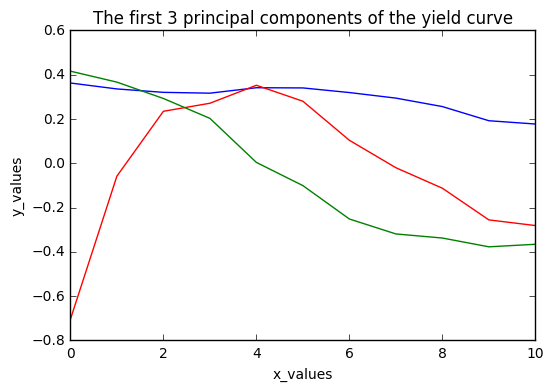

In [7]:
# plot time series of the first 3 principal components
plt.plot(matrix_w)
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('The first 3 principal components of the yield curve')
plt.show()